In [40]:
import os 
import pandas as pd
import numpy as np
import pickle 
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, accuracy_score, make_scorer, confusion_matrix

In [41]:
def classification_report_with_accuracy_score(y_true, y_pred):
    originalclass.extend(y_true)
    predictedclass.extend(y_pred)
    return accuracy_score(y_true, y_pred) # return accuracy score


<h1> Training ML <h1>

In [42]:
mapping_label =['Bronchiectasis','Bronchiolitis', 'LRTI', 'Pneumonia','URTI','Asthma']

In [43]:
with open('../../data/data_model/data_dict.pkl','rb') as f:
    data = pickle.load(f)

In [44]:
clf = RandomForestClassifier(n_estimators = 500, 
    max_depth=2,
    class_weight = 'balanced', 
    random_state=0
    )

In [45]:
data.keys()

dict_keys(['feature_mean', 'features', 'info_feature_type', 'label'])

In [46]:
X=data['feature_mean']
y = pd.Series(data['label'])
y = y.replace(mapping_label,'respiratory_infection')
y = y.values

In [47]:
np.shape(X)

(920, 77)

In [48]:
skf = StratifiedKFold(n_splits=10)
cv =  skf.split(X, y)
originalclass = []
predictedclass = []
score = cross_val_score(clf, X=X, y=y, cv=cv, scoring=make_scorer(classification_report_with_accuracy_score))

c = classification_report(originalclass, predictedclass)
print(c)

                       precision    recall  f1-score   support

                 COPD       0.98      0.94      0.96       793
              Healthy       0.41      0.54      0.47        35
respiratory_infection       0.54      0.66      0.59        92

             accuracy                           0.90       920
            macro avg       0.64      0.72      0.67       920
         weighted avg       0.91      0.90      0.90       920



In [50]:
clf.fit(X,y)

RandomForestClassifier(class_weight='balanced', max_depth=2, n_estimators=500,
                       random_state=0)

In [61]:
data['info_feature_type']

array(['rmse', 'chroma_stft', 'chroma_stft', 'chroma_stft', 'chroma_stft',
       'chroma_stft', 'chroma_stft', 'chroma_stft', 'chroma_stft',
       'chroma_stft', 'chroma_stft', 'chroma_stft', 'chroma_stft',
       'spec_cent', 'spec_bw', 'rolloff', 'zcr', 'mfcc', 'mfcc', 'mfcc',
       'mfcc', 'mfcc', 'mfcc', 'mfcc', 'mfcc', 'mfcc', 'mfcc', 'mfcc',
       'mfcc', 'mfcc', 'mfcc', 'mfcc', 'mfcc', 'mfcc', 'mfcc', 'mfcc',
       'mfcc', 'delta_mfcc', 'delta_mfcc', 'delta_mfcc', 'delta_mfcc',
       'delta_mfcc', 'delta_mfcc', 'delta_mfcc', 'delta_mfcc',
       'delta_mfcc', 'delta_mfcc', 'delta_mfcc', 'delta_mfcc',
       'delta_mfcc', 'delta_mfcc', 'delta_mfcc', 'delta_mfcc',
       'delta_mfcc', 'delta_mfcc', 'delta_mfcc', 'delta_mfcc',
       'delta2_mfcc', 'delta2_mfcc', 'delta2_mfcc', 'delta2_mfcc',
       'delta2_mfcc', 'delta2_mfcc', 'delta2_mfcc', 'delta2_mfcc',
       'delta2_mfcc', 'delta2_mfcc', 'delta2_mfcc', 'delta2_mfcc',
       'delta2_mfcc', 'delta2_mfcc', 'delta2_mfcc', 

In [94]:
df_feat = pd.Series(clf.feature_importances_,index=data['info_feature_type'])

In [154]:
x = ['rmse', 'chroma_stft1', 'chroma_stft2', 'chroma_stft3', 'chroma_stft4',
       'chroma_stft5', 'chroma_stft6', 'chroma_stft7', 'chroma_stft8',
       'chroma_stft9', 'chroma_stft10', 'chroma_stft11', 'chroma_stft12',
       'spec_cent', 'spec_bw', 'rolloff', 'zcr', 'mfcc1', 'mfcc2', 'mfcc3',
       'mfcc4', 'mfcc5', 'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10',
       'mfcc11', 'mfcc12', 'mfcc13', 'mfcc14', 'mfcc15', 'mfcc16', 'mfcc17', 'mfcc18',
       'mfcc19','mfcc20', 'delta_mfcc1', 'delta_mfcc2', 'delta_mfcc3', 'delta_mfcc4',
       'delta_mfcc5', 'delta_mfcc6', 'delta_mfcc7', 'delta_mfcc8',
       'delta_mfcc9', 'delta_mfcc10', 'delta_mfcc11', 'delta_mfcc12',
       'delta_mfcc13', 'delta_mfcc14', 'delta_mfcc15', 'delta_mfcc16',
       'delta_mfcc17', 'delta_mfcc18', 'delta_mfcc19', 'delta_mfcc20',
       'delta2_mfcc1', 'delta2_mfcc2', 'delta2_mfcc3', 'delta2_mfcc4',
       'delta2_mfcc5', 'delta2_mfcc6', 'delta2_mfcc7', 'delta2_mfcc8',
       'delta2_mfcc9', 'delta2_mfcc10', 'delta2_mfcc11', 'delta2_mfcc12',
       'delta2_mfcc13', 'delta2_mfcc14', 'delta2_mfcc15', 'delta2_mfcc16',
       'delta2_mfcc17', 'delta2_mfcc18', 'delta2_mfcc19', 'delta2_mfcc20']

df_feat = pd.Series(clf.feature_importances_,index=x)
df_feat = df_feat.sort_values(0,ascending=False).reset_index()
df_feat.columns= ['feature_type','feature_importance']

/var/folders/xx/qddw26dx0174zw4hpmjq3gjh0000gn/T/ipykernel_18803/1891868370.py:19: FutureWarning: In a future version of pandas all arguments of Series.sort_values will be keyword-only.
  df_feat = df_feat.sort_values(0,ascending=False).reset_index()


In [156]:
df_feat.head(10)

,feature_type,feature_importance
0,delta2_mfcc9,0.087611
1,delta2_mfcc13,0.085778
2,delta2_mfcc7,0.074160
3,mfcc1,0.070574
4,rmse,0.068519
5,delta2_mfcc11,0.061320
6,delta2_mfcc5,0.060089
7,delta2_mfcc15,0.042623
8,delta2_mfcc17,0.037997
9,delta_mfcc13,0.019263


In [128]:
df_feat = pd.Series(clf.feature_importances_,index=data['info_feature_type'])
df_feat = df_feat.to_frame().reset_index().groupby('index').sum()
df_feat = df_feat.sort_values(0).reset_index()
df_feat.columns= ['feature_type','feature_importance']

In [129]:
df_feat

,feature_type,feature_importance
0,spec_cent,0.001800
1,rolloff,0.004797
2,zcr,0.008674
3,spec_bw,0.009598
4,rmse,0.068519
5,chroma_stft,0.073512
6,delta_mfcc,0.141493
7,mfcc,0.169125
8,delta2_mfcc,0.522482


<AxesSubplot: xlabel='feature_type'>

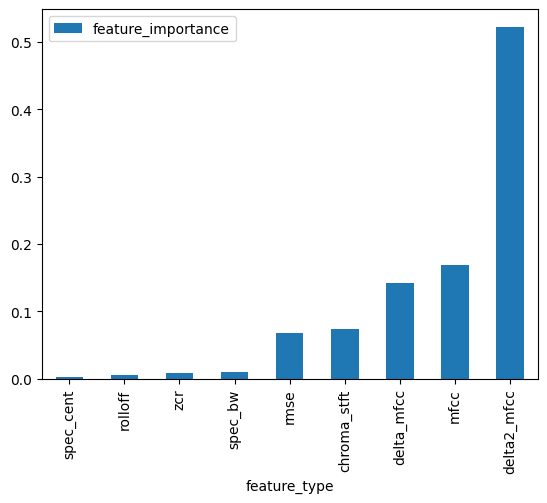

In [138]:
df_feat.plot.bar(x='feature_type',y='feature_importance')

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

x = confusion_matrix(originalclass, predictedclass)
print(x)

[[745   9  39]
 [  2  19  14]
 [ 13  18  61]]
